# My Model!

## Feature Extraction

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix

from sklearn.pipeline import Pipeline

from sklearn import svm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

import string

Loading files into DataFrames, splitting them into training and testing set

In [49]:
X_train = pd.read_csv("./data/X_train.csv")
X_train = X_train.dropna(subset=["Summary", "Text"])

X_submission = pd.read_csv("./data/X_submission.csv")

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=7000,
        train_size = 7000,
        random_state=0
    )

In [50]:
def cleanstringsummary(text):
    if type(text) == float:
        return "good "
    # no_punct=[words for words in text if words not in string.punctuation]
    # words_wo_punct=''.join(no_punct)
    words_wo_punct = text.translate(str.maketrans('', '', string.punctuation))
    return words_wo_punct.lower() + ' '

def cleanstringtext(text):
    if type(text) == float:
        return "good"
    # no_punct=[words for words in text if words not in string.punctuation]
    # words_wo_punct=''.join(no_punct)
    # words_wo_punct = text.translate(str.maketrans("",""), string.punctuation)
    words_wo_punct = text.translate(str.maketrans('', '', string.punctuation))
    return words_wo_punct.lower() 
    
summarystrings_train = X_train["Summary"].apply(cleanstringsummary)
print('done with summarystrings')
textstrings_train = X_train["Text"].apply(cleanstringtext)
print('done with textstrings')
processedinput = summarystrings_train.add(textstrings_train)
print('done with joining')

done with summarystrings
done with textstrings
done with joining


An example of the processed input

In [55]:
for x in processedinput:
    print(x)
    break

fashionista farce this movie got some seriously bad reviews but i liked it as a biting and farcical satire of the idiocies of the modern fashion industry


In [51]:
summarystrings_test = X_test["Summary"].apply(cleanstringsummary)
print('done with summarystrings')
textstrings_test = X_test["Text"].apply(cleanstringtext)
print('done with textstrings')
processedinput_test = summarystrings_test.add(textstrings_test)
print('done with joining')

done with summarystrings
done with textstrings
done with joining


## Developing the Model

In [52]:
print(processedinput.shape)
model = Pipeline([('vect', CountVectorizer(max_df=.8)),
               ('tfidf', TfidfTransformer(sublinear_tf = True)),
               ('svc', svm.SVC(class_weight='balanced', C=2.0, kernel='linear')),
              ])

model.fit(processedinput, Y_train)

(7000,)


Pipeline(steps=[('vect', CountVectorizer(max_df=0.8)),
                ('tfidf', TfidfTransformer(sublinear_tf=True)),
                ('svc', SVC(C=2.0, class_weight='balanced', kernel='linear'))])

## Validation

### This is while only using 7000 datapoints to train

RMSE on testing set =  1.0427142857142857


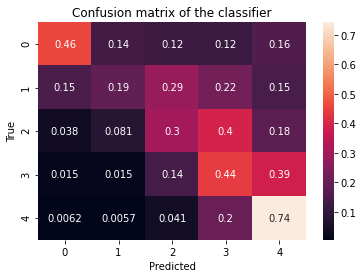

In [54]:
# Predict the score using the model
Y_test_predictions = model.predict(processedinput_test)

# X_submission['Score'] = nb.predict(X_test_strings)

# Evaluate your model on the testing set
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### This is while using 60000 points to train, which was the model that I used to submit final predictions

RMSE on testing set =  0.9421428571428572


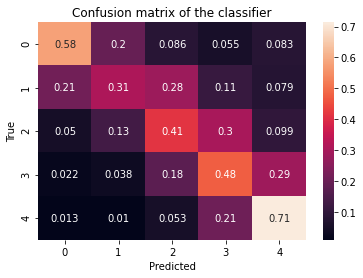

In [46]:
# Predict the score using the model
Y_test_predictions = model.predict(processedinput_test)

# X_submission['Score'] = nb.predict(X_test_strings)

# Evaluate your model on the testing set
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Predicting and saving submission file

In [47]:
X_submission = pd.read_csv("./data/X_submission.csv")
summarystrings_submission = X_submission["Summary"].apply(cleanstringsummary)
print('done with summarystrings')
textstrings_submission = X_submission["Text"].apply(cleanstringtext)
print('done with textstrings')
processedinput_submission = summarystrings_submission.add(textstrings_submission)
print('done with joining')

print(processedinput_submission.shape)

X_submission['Score'] = model.predict(processedinput_submission)
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)

done with summarystrings
done with textstrings
done with joining
(300000,)


# Trash below this

In [22]:
# Predict the score using the model
Y_test_predictions = text_classifier.predict(processedinput_test)

# X_submission['Score'] = nb.predict(X_test_strings)

# Evaluate your model on the testing set
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ValueError: could not convert string to float: 'sleeptochicago i must be from another planetive read so many great reviews of quotchicagoquoti loved quotcabaretquotloved the music from the play i heard over the yearsloved fosses workbut hate this filmits horribleif your having trouble sleeping at nightbuy this dvd'

In [6]:
# Model that predicts average
import numpy as np

predictpoint(point, dataset):
    point_id = point['ProductId']
    points = dataset[dataset['ProductId'] == point_id]
    return np.average(points)

Predictions = Y_test.apply(predictpoint(dataset=Y_test), axis=1)

SyntaxError: invalid syntax (<ipython-input-6-a165bc031815>, line 4)

In [20]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(processed_features, Y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [19]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processedinput).toarray()

In [24]:
# DEVELOP THE MODEL 2

import nltk
from nltk.corpus import stopwords

"""model = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ]) """
print(processedinput.shape)

# max_features=2500, min_df=7, max_df=0.8
model_two = Pipeline([('vect', CountVectorizer(min_df=7, max_df=0.8)),
               ('tfidf', TfidfTransformer()),
               ('svc', svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')),
              ])

model_two.fit(processedinput, Y_train)

(10000,)


Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8, max_features=2500, min_df=7)),
                ('tfidf', TfidfTransformer()),
                ('svc', SVC(gamma='auto', kernel='linear'))])

RMSE on testing set =  1.1528571428571428


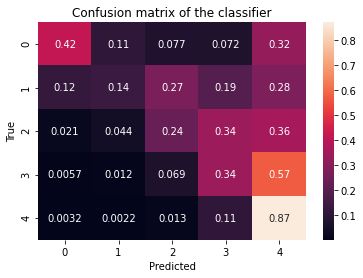

In [25]:
# Predict the score using the model
Y_test_predictions = model_two.predict(processedinput_test)

# X_submission['Score'] = nb.predict(X_test_strings)

# Evaluate your model on the testing set
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [38]:
# DEVELOP THE MODEL 2
from sklearn.ensemble import RandomForestClassifier

print(processedinput.shape)
model_two = Pipeline([('vect', CountVectorizer(max_df=.8)),
               ('tfidf', TfidfTransformer(sublinear_tf = True)),
               ('randomforest', RandomForestClassifier(n_estimators=200, random_state=0, class_weight = 'balanced')),
              ])

model_two.fit(processedinput, Y_train)

(30000,)


Pipeline(steps=[('vect', CountVectorizer(max_df=0.8)),
                ('tfidf', TfidfTransformer(sublinear_tf=True)),
                ('randomforest',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=0))])

RMSE on testing set =  2.262142857142857


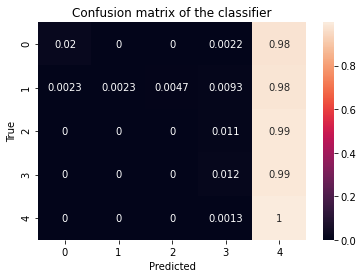

In [39]:
# Predict the score using the model 2
Y_test_predictions = model_two.predict(processedinput_test)

# X_submission['Score'] = nb.predict(X_test_strings)

# Evaluate your model on the testing set
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()